In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# Loading the dataset 
data = pd.read_csv("disney_plus_titles.csv")

In [3]:
# Display the first five rows of the DataFrame
# This is useful for getting a quick overview of the data structure and content
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
# Display the last five rows of the DataFrame
# This helps to check the end portion of the dataset and ensure data integrity
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [6]:
# Generate descriptive statistics of the numerical columns in the DataFrame
data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
# Print the shape of the 'data' DataFrame
print(data.shape)  # Shape will be printed as (number of rows, number of columns)

(1368, 12)


In [8]:
# Responsibility 1: Time Series Analysis (forecasting trends and seasonality)

# Converting 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

In [9]:
# Extracting month and year from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [10]:
# Group by year and month to get the count of titles added each month
monthly_trends = data.groupby(['year_added', 'month_added']).size().reset_index(name='count')

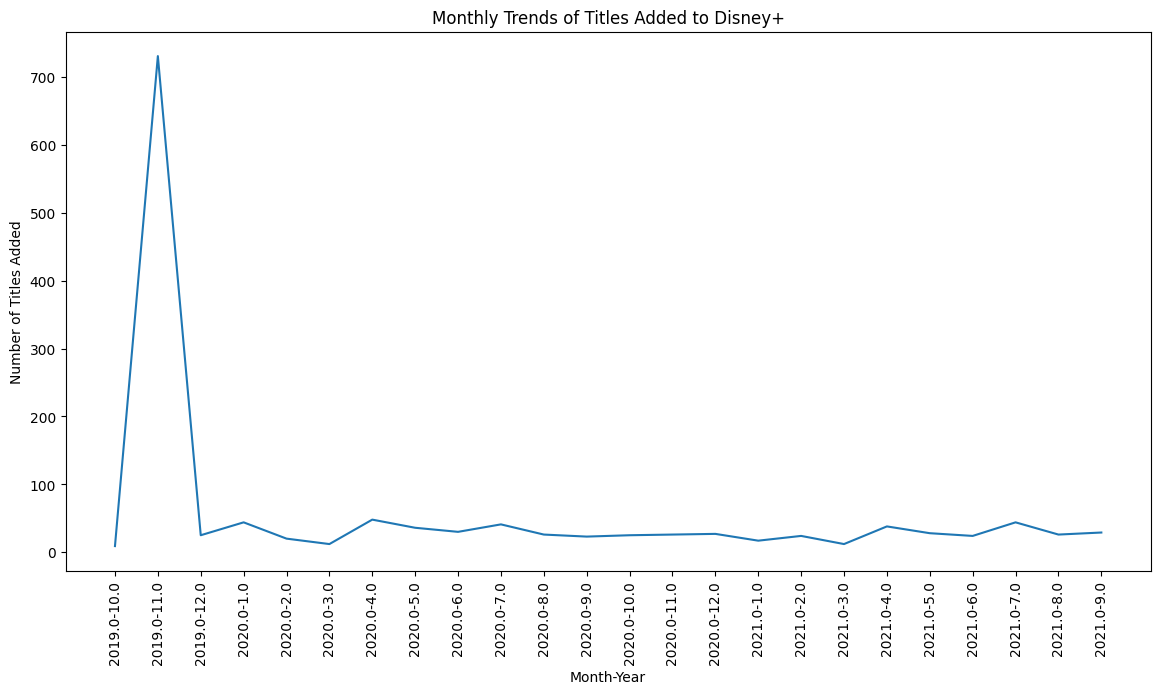

In [11]:
# Plotting the monthly trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends['year_added'].astype(str) + '-' + monthly_trends['month_added'].astype(str), 
         monthly_trends['count'])
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Number of Titles Added')
plt.title('Monthly Trends of Titles Added to Disney+')
plt.show()

In [12]:
# Responsibilty 2: Sentiment Analysis or Text Mining on Unstructured Data

# Generating a word cloud from the 'title' column
text = ' '.join(title for title in data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


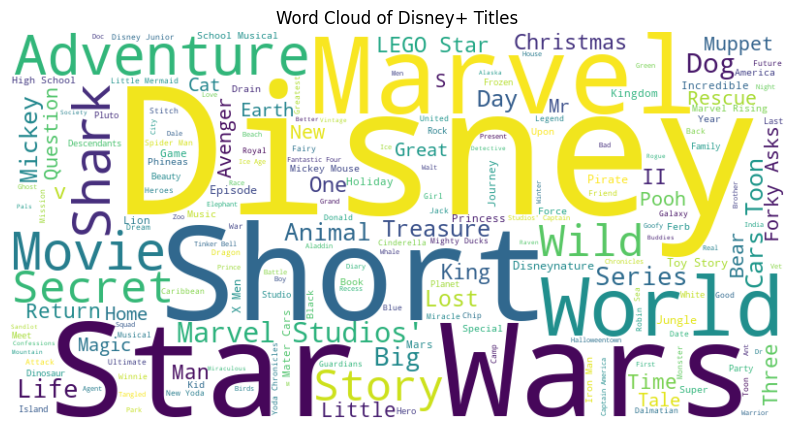

In [13]:
# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disney+ Titles')
plt.show()

In [14]:
# Performing sentiment analysis on 'description' column
sid = SentimentIntensityAnalyzer()
data['sentiment'] = data['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [15]:
# Classifying sentiment as positive, negative, or neutral
data['sentiment_class'] = pd.cut(data['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

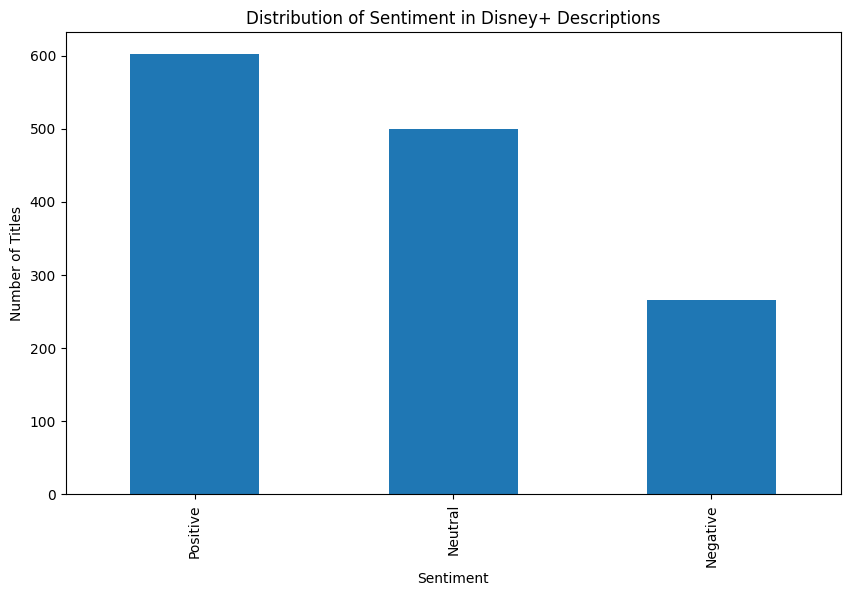

In [16]:
# Plottting the distribution of sentiment
sentiment_counts = data['sentiment_class'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')
plt.title('Distribution of Sentiment in Disney+ Descriptions')
plt.show()

In [17]:
# Responsibility 3: Clustering or Classification Techniques for Segmentation and Pattern Recognition

# Handling non-numeric 'duration' values (e.g., "2 Seasons", "1 Season")
# Extracting the number of seasons and convert to numeric, keeping movies as they are

data['duration'] = data['duration'].apply(lambda x: x.split()[0] if 'Season' in x else x)
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

In [18]:
# Filling NaN values in 'duration' with the median value
data['duration'].fillna(data['duration'].median(), inplace=True)

In [19]:
# Selecting numerical features for clustering
X_clustering = data[['release_year', 'duration']]

In [20]:
# Scaling numerical features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

In [21]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_clustering_scaled)
data['cluster'] = kmeans.labels_

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


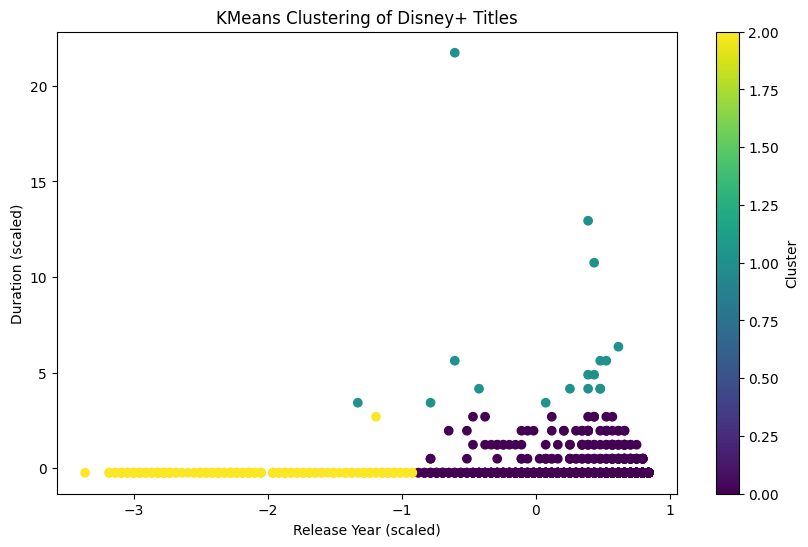

In [22]:
# Plotting the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=data['cluster'], cmap='viridis', marker='o')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Duration (scaled)')
plt.title('KMeans Clustering of Disney+ Titles')
plt.colorbar(label='Cluster')
plt.show()

In [23]:
# Descriptive statistics of clusters
cluster_summary = data.groupby('cluster').agg({
    'release_year': ['mean', 'median', 'std'],
    'duration': ['mean', 'median', 'std'],
    'title': 'count'
}).reset_index()
cluster_summary.columns = ['Cluster', 'Release_year Mean', 'Release_year Median', 'Release_year Std', 'Duration Mean', 'Duration Median', 'Duration Std', 'Title Count']
print(cluster_summary)

   Cluster  Release_year Mean  Release_year Median  Release_year Std  \
0        0        2010.543006               2013.0          9.279131   
1        1        2003.941176               2011.0         12.920287   
2        2        1955.055000               1953.0         14.693928   

   Duration Mean  Duration Median  Duration Std  Title Count  
0       1.234579              1.0      0.680578         1151  
1      10.117647              8.0      6.431197           17  
2       1.020000              1.0      0.282843          200  


In [24]:
# Questions
questions = [
    "1. How many movies and TV shows are there on Disney+?",
    "2. Which country has produced the most titles on Disney+?",
    "3. What are the top 10 most common genres listed in Disney+ titles?",
    "4. How has the number of titles added to Disney+ changed over the years?",
    "5. Which Disney+ titles have the highest sentiment scores?"
]
questions

['1. How many movies and TV shows are there on Disney+?',
 '2. Which country has produced the most titles on Disney+?',
 '3. What are the top 10 most common genres listed in Disney+ titles?',
 '4. How has the number of titles added to Disney+ changed over the years?',
 '5. Which Disney+ titles have the highest sentiment scores?']

In [25]:
# Question 1: How many movies and TV shows are there on Disney+?
movie_count = data[data['type'] == 'Movie'].shape[0]
tv_show_count = data[data['type'] == 'TV Show'].shape[0]
print(f"1. There are {movie_count} movies and {tv_show_count} TV shows on Disney+.")

1. There are 991 movies and 377 TV shows on Disney+.


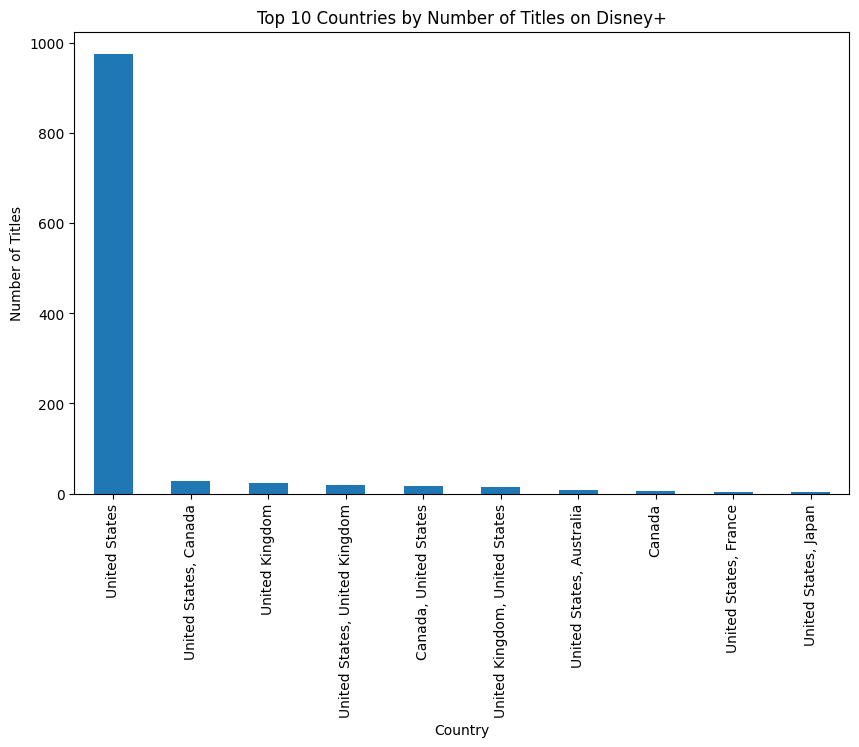

In [26]:
# Question 2: Which country has produced the most titles on Disney+?
country_counts = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries by Number of Titles on Disney+')
plt.show()

In [27]:
# Answer 2 : United States has produced the most titles on Disney+

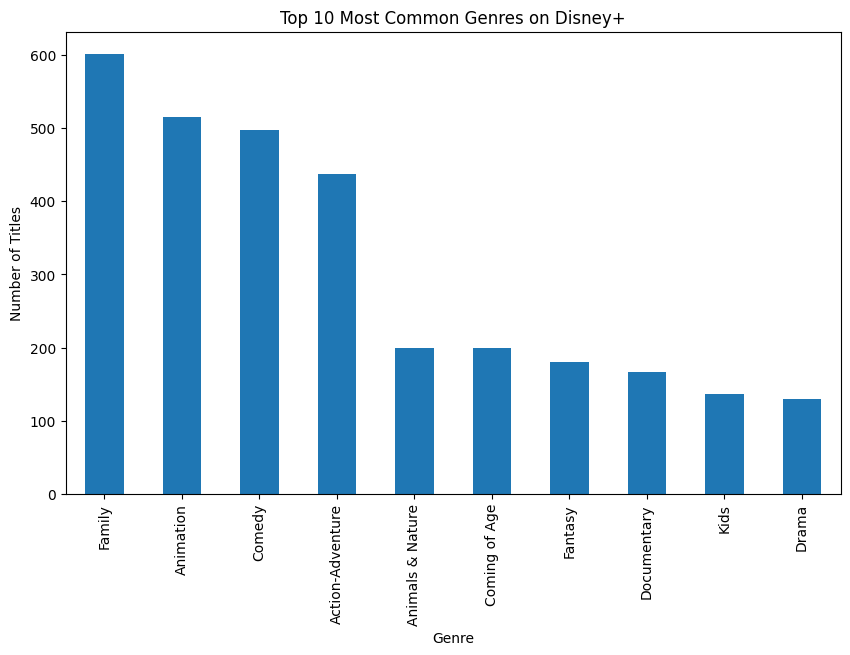

In [28]:
# Question 3: What are the top 10 most common genres listed in Disney+ titles?
genre_counts = data['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Top 10 Most Common Genres on Disney+')
plt.show()

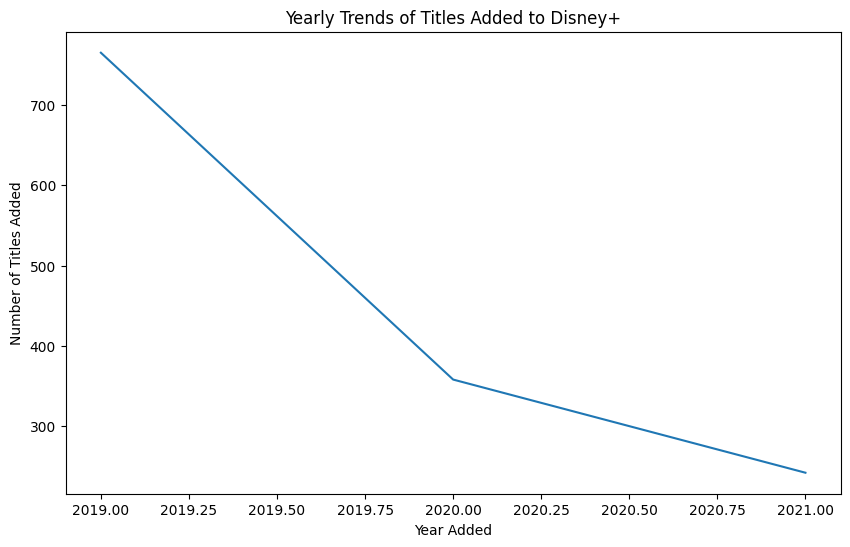

In [29]:
# Question 4: How has the number of titles added to Disney+ changed over the years?
yearly_trends = data['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_trends.plot(kind='line')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.title('Yearly Trends of Titles Added to Disney+')
plt.show()

In [30]:
# Question 5: Which Disney+ titles have the highest sentiment scores?
# Perform sentiment analysis on 'description' column
sid = SentimentIntensityAnalyzer()
data['sentiment'] = data['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the titles with the highest sentiment scores
top_sentiment_titles = data[['title', 'sentiment']].sort_values(by='sentiment', ascending=False).head(5)

print("The Disney+ titles with the highest sentiment scores are:")
print(top_sentiment_titles)


The Disney+ titles with the highest sentiment scores are:
                                  title  sentiment
598                The Super Hero Squad     0.9413
986               Marvel's Hero Project     0.9393
592  Marvel 75 Years: From Pulp to Pop!     0.9300
879           How to Build a Better Boy     0.9274
948                      Lizzie McGuire     0.9246
